In [1]:
#import all the required packages
import hashlib
import random
import time
import matplotlib.pyplot as plt

In [2]:
class BloomFilter:
    def __init__(self, size, num_hashes):
        """Initialize the Bloom filter with a specified size and number of hash functions."""
        self.size = size  # The size of the bit array
        self.num_hashes = num_hashes  # The number of hash functions to use
        self.bit_array = [0] * size  # Initialize the bit array with zeros

    def _hashes(self, item):
        """Generate multiple hash values for a given item using double hashing."""
        hash1 = int(hashlib.md5(str(item).encode()).hexdigest(), 16)
        hash2 = int(hashlib.sha256(str(item).encode()).hexdigest(), 16)
        for i in range(self.num_hashes):
            yield (hash1 + i * hash2) % self.size  # Yield a hash value for each function

    def add(self, item):
        """Add an item to the Bloom filter."""
        for hash_val in self._hashes(item):
            self.bit_array[hash_val] = 1  # Set the bits at the hash values to 1

    def contains(self, item):
        """Check if an item is in the Bloom filter."""
        return all(self.bit_array[hash_val] for hash_val in self._hashes(item))  # Check all bits are set

In [3]:
def read_words_from_file(file_path):
    """Read words from a file, assuming one word per line."""
    with open(file_path, 'r') as file:
        words = [line.strip() for line in file.readlines() if line.strip()]
    return words  # Return a list of words

In [4]:
def calculate_false_positive_rate(bf, samples, words):
    """Calculate the false positive rate of the Bloom filter."""
    false_positives = 0
    tested_samples = 0
    while tested_samples < samples:
        random_word = ''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=10))
        if random_word not in words:
            tested_samples += 1
            if bf.contains(random_word):
                false_positives += 1
    return false_positives / samples  # Return the false positive rate

In [5]:
def measure_performance(words, size, num_hashes):
    """Measure the time it takes to add and check items in the Bloom filter."""
    add_times = []
    check_times = []
    intervals = range(100, len(words) + 1, 100)
    
    for i in intervals:
        bf = BloomFilter(size=size, num_hashes=num_hashes)  # Re-initialize Bloom filter for each interval

        # Measure add time
        start_time = time.time()
        for word in words[:i]:
            bf.add(word)
        add_times.append(time.time() - start_time)

        # Measure check time
        start_time = time.time()
        for word in words[:i]:
            bf.contains(word)
        check_times.append(time.time() - start_time)
        
    return intervals, add_times, check_times  # Return the times and intervals

In [6]:
def analyze_false_positive_rate_vs_size(words, sizes, num_hashes):
    """Analyze false positive rate as a function of Bloom filter size."""
    false_positive_rates = []
    for size in sizes:
        bf = BloomFilter(size=size, num_hashes=num_hashes)
        for word in words:
            bf.add(word)
        fpr = calculate_false_positive_rate(bf, 10000, words)
        false_positive_rates.append(fpr)
    return false_positive_rates

In [7]:
# Example of usage
file_path = 'sample_words.txt'  # Specify the path to your file
words = read_words_from_file(file_path)

In [8]:
# Measure and plot performance
intervals, add_times, check_times = measure_performance(words, size=10000, num_hashes=5)
fpr = calculate_false_positive_rate(BloomFilter(size=10000, num_hashes=5), 10000, words)

In [9]:
# Print the performance results
for interval, add_time, check_time in zip(intervals, add_times, check_times):
    print(f"Processed {interval} items: Add Time = {add_time:.4f}s, Check Time = {check_time:.4f}s")

print("False Positive Rate:", f"{fpr:.4%}")

Processed 100 items: Add Time = 0.0060s, Check Time = 0.0020s
Processed 200 items: Add Time = 0.0031s, Check Time = 0.0030s
Processed 300 items: Add Time = 0.0020s, Check Time = 0.0061s
Processed 400 items: Add Time = 0.0094s, Check Time = 0.0077s
False Positive Rate: 0.0000%


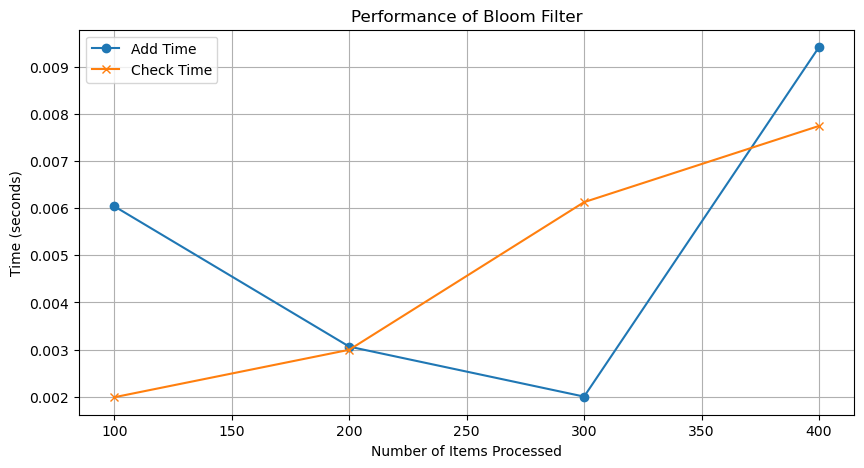

In [10]:
# Plotting the performance results
plt.figure(figsize=(10, 5))
plt.plot(intervals, add_times, label='Add Time', marker='o')
plt.plot(intervals, check_times, label='Check Time', marker='x')
plt.xlabel('Number of Items Processed')
plt.ylabel('Time (seconds)')
plt.title('Performance of Bloom Filter')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Analyze false positive rate vs Bloom filter size
sizes = [1000, 5000, 10000, 20000, 50000]
false_positive_rates = analyze_false_positive_rate_vs_size(words, sizes, num_hashes=5)

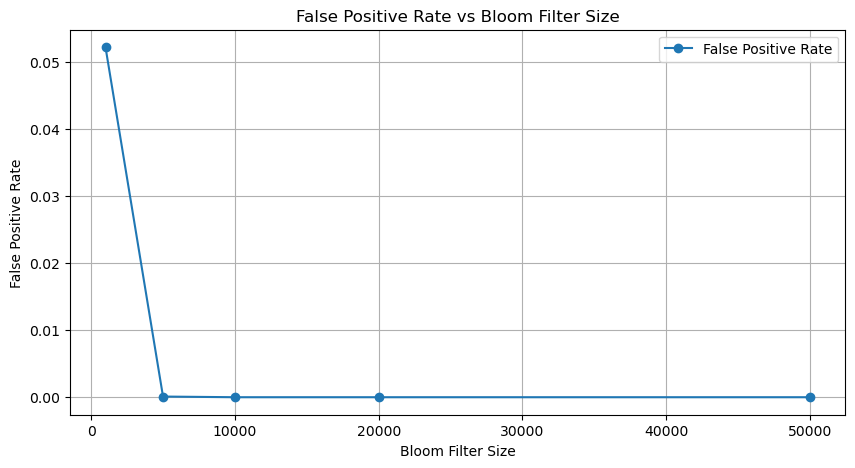

In [12]:
# Plotting false positive rate vs Bloom filter size
plt.figure(figsize=(10, 5))
plt.plot(sizes, false_positive_rates, label='False Positive Rate', marker='o')
plt.xlabel('Bloom Filter Size')
plt.ylabel('False Positive Rate')
plt.title('False Positive Rate vs Bloom Filter Size')
plt.legend()
plt.grid(True)
plt.show()